In [1]:
suppressPackageStartupMessages(suppressWarnings(library(lintr))) # linting
suppressPackageStartupMessages(suppressWarnings(library(ggplot2))) # plotting
suppressPackageStartupMessages(suppressWarnings(library(dplyr))) # data manipulation
suppressPackageStartupMessages(suppressWarnings(library(reshape2))) # data manipulation
suppressPackageStartupMessages(suppressWarnings(library(ggridges))) # ridgeline plots
suppressPackageStartupMessages(suppressWarnings(library(RColorBrewer))) # color palettes
suppressPackageStartupMessages(suppressWarnings(library(patchwork))) # color palettes

In [2]:
# getting all paths

# confusing matrix paths
confusion_matrix_path <- file.path("../../results/2.modeling/confusion_matrix.csv.gz")
overlapping_confusion_matrix_path <- file.path("../../results/2.modeling/jump_overlap_confusion_matrix.csv.gz")

# f1 score path
f1_score_path <- file.path("../../results/2.modeling/all_f1_scores.csv.gz")

# precision and recall curve path
pr_file_path <- file.path("../../results/2.modeling/precision_recall_scores.csv.gz")

# probability plot
proba_path <- file.path("../../results/3.jump_analysis/JUMP_injury_proba.csv.gz")

In [3]:
# loading all data

# loading confusion matrices
cm_df <- read.csv(confusion_matrix_path, sep = ",")
overlapping_cm_df <- read.csv(overlapping_confusion_matrix_path, sep = ",")

# loading f1 score paths
f1_df <- read.csv(f1_score_path, sep = ",")

# loading pr curve data
pr_df <- read.csv(pr_file_path)

# loading probabilities
proba_df <- read.table(proba_path, head = TRUE, sep=",")

In [4]:
# pre-formatting data before plotting

# update one of the shuffled_model columns to Shuffled and Not Shuffled
cm_df$shuffled_model <- ifelse(cm_df$shuffled_model == "False", "Not Shuffled",
                            ifelse(cm_df$shuffled_model == "True", "Shuffled", cm_df$shuffled_model))

# update one of the shuffled_model columns to Shuffled and Not Shuffled
overlapping_cm_df$shuffled_model <- ifelse(overlapping_cm_df$shuffled_model == "False", "Not Shuffled",
                            ifelse(overlapping_cm_df$shuffled_model == "True", "Shuffled", overlapping_cm_df$shuffled_model))

# replacing True and False to shuffled to non shuffled
f1_df$shuffled <- ifelse(f1_df$shuffled == "False", "Not Shuffled",
                                      ifelse(f1_df$shuffled == "True", "Shuffled", f1_df$shuffled))

# update one of the shuffled_model columns to Shuffled and Not Shuffled
pr_df$shuffled <- ifelse(pr_df$shuffled == "False", "Not Shuffled",
                  ifelse(pr_df$shuffled == "True", "Shuffled", pr_df$shuffled))


# replacing True and False to shuffled to non shuffled
proba_df$shuffled_model <- ifelse(proba_df$shuffled_model == "False", "Not Shuffled",
                                      ifelse(proba_df$shuffled_model == "True", "Shuffled", proba_df$shuffled_model))

## Creating confusing Matrices

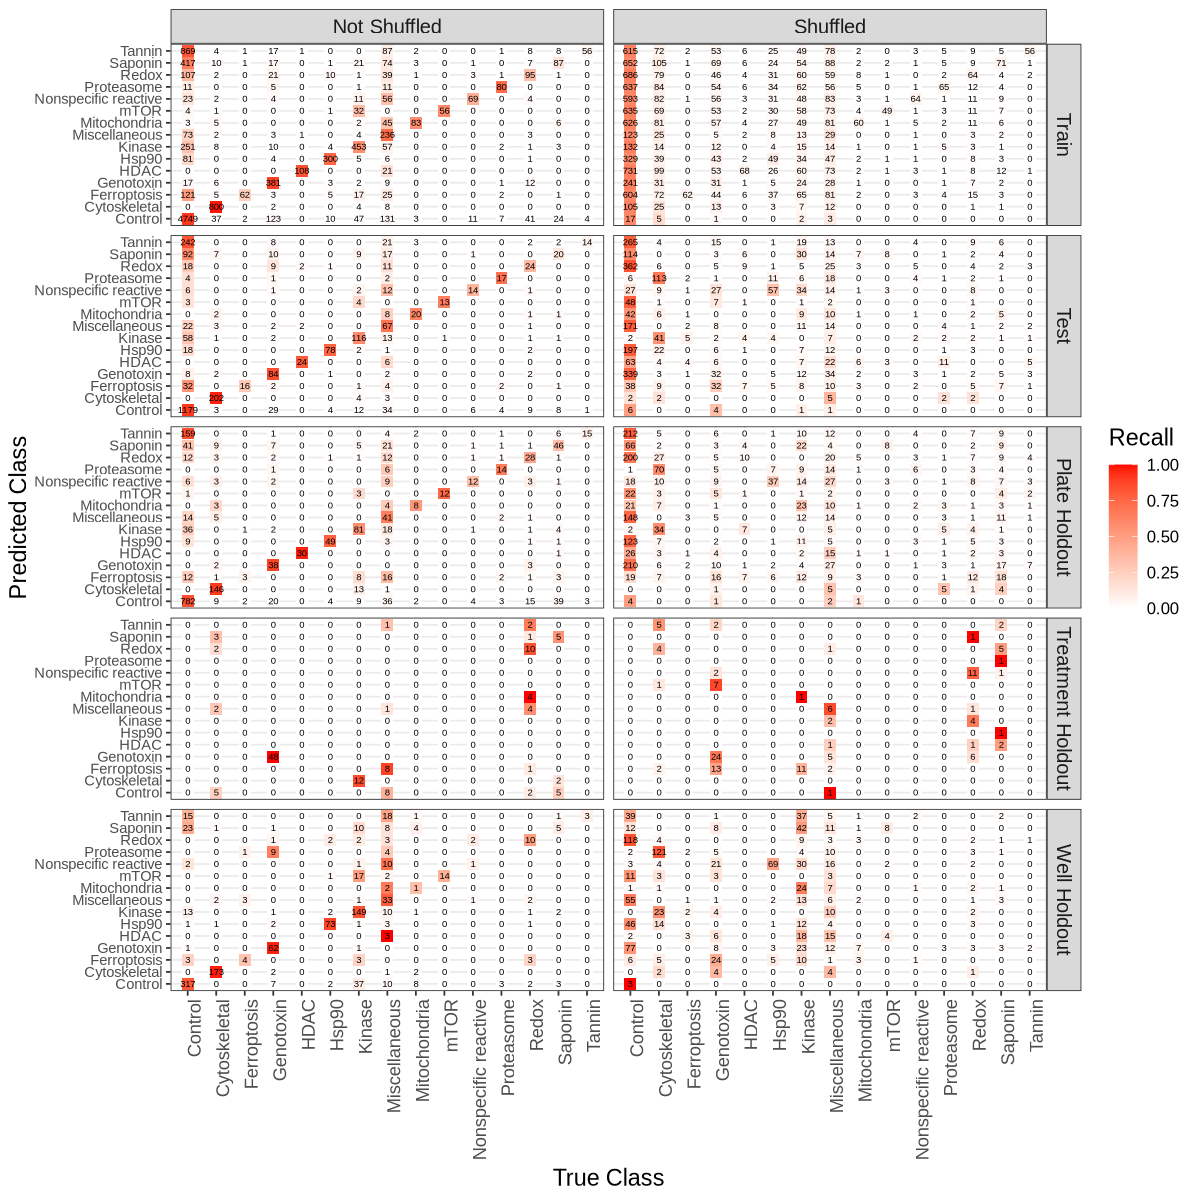

In [5]:
# Define the desired order of facet levels
facet_order <- c("Train", "Test", "Plate Holdout", "Treatment Holdout", "Well Holdout")
cm_df$dataset_type <- factor(cm_df$dataset_type, levels = facet_order)

width <- 10
height <- 10
options(repr.plot.width = width, repr.plot.height = height)

confusion_matrix_plot <- (
    ggplot(cm_df, aes(x = true_labels, y = predicted_labels))
    + facet_grid(dataset_type ~ shuffled_model)
    + geom_point(aes(color = recall), size = 3, shape = 15)
    + geom_text(aes(label = count), size = 2)
    + scale_color_gradient("Recall", low = "white", high = "red", limits = c(0, 1))
    + theme_bw()
    + ylab("Predicted Class")
    + xlab("True Class")
    + theme(
        legend.title =  element_text(size = 14, margin = margin(b = 10)),
        legend.text = element_text(size = 10),
        strip.text = element_text(size = 12),
        axis.text.x = element_text(angle = 90, hjust = 1, size = 11),
        axis.title.x.bottom = element_text(size = 14),
        axis.title.y.left = element_text(size = 14)
        )
)

# saving file
ggsave(filename = "figures/confusion_matrix.png", height = height, width = width, dpi = 600)

confusion_matrix_plot


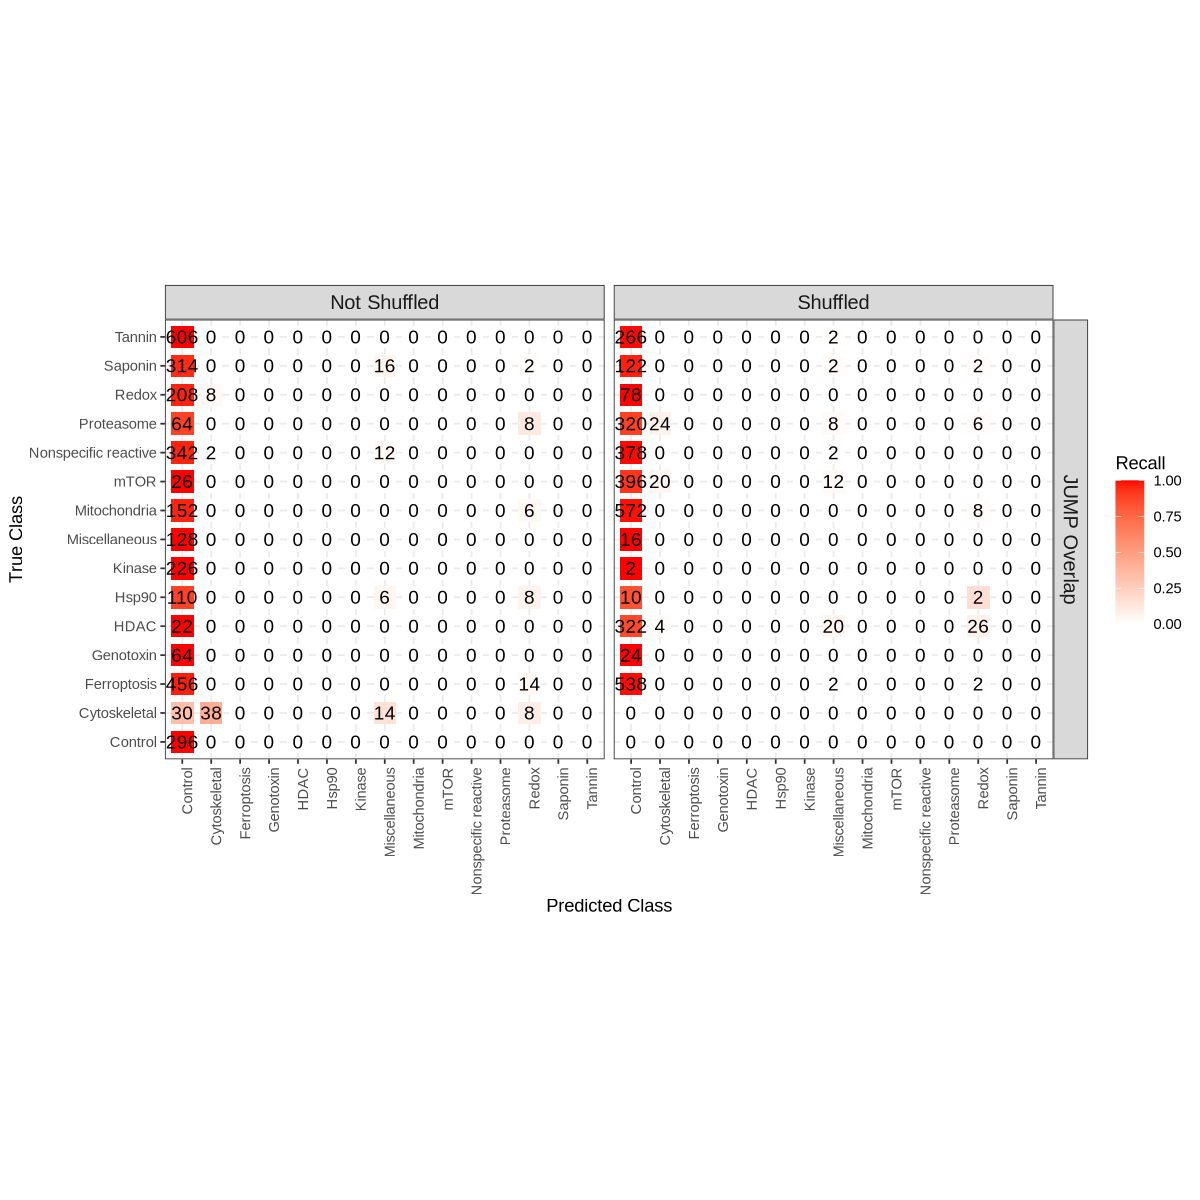

In [6]:
# set image dim
width <- 10
height <- 10
options(repr.plot.width = width, repr.plot.height = height)

# create a confusion matrix plot
overlapping_confusion_matrix_plot <- (
    ggplot(overlapping_cm_df, aes(x = true_labels, y = predicted_labels))
    + facet_grid(dataset_type~shuffled_model)
    + geom_point(aes(color = recall), size = 6, shape = 15)
    + geom_text(aes(label = count), size = 4)
    + scale_color_gradient("Recall", low = "white", high = "red",limits = c(0, 1))
    + theme_bw()
    + ylab("True Class")
    + xlab("Predicted Class")
    + theme(strip.text = element_text(size = 12))
    + theme(axis.text.x = element_text(angle = 90, hjust = 1))
    + ggplot2::coord_fixed()
)

# saving file
ggsave(filename = "figures/overlapping_confusion_matrix.png", height = height, width = width, dpi=600)

overlapping_confusion_matrix_plot

## Creating F1 score plots 

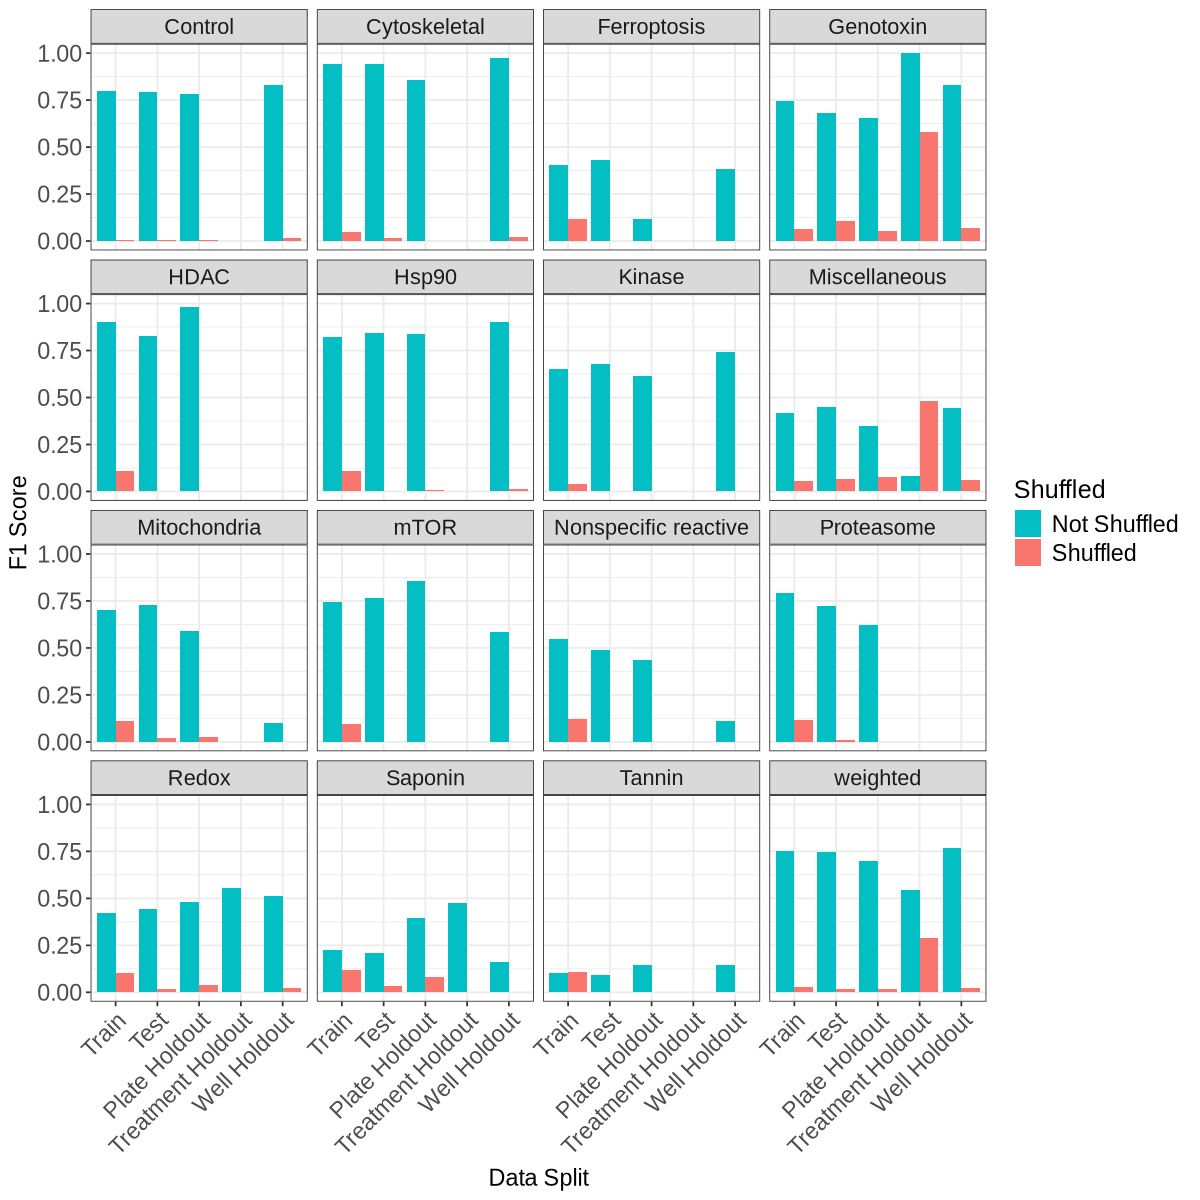

In [7]:
# image size
img_height <- 10
img_width <- 10

options(repr.plot.width = img_width, repr.plot.height = img_height)

# creating a bar plot with a facet grid dictated by whether the model has been shuffled or not
# along the y, facet grid was generated based on the dataset type
legend_order <- c("Train", "Test", "Plate Holdout", "Treatment Holdout", "Well Holdout")

f1_bar_plot <- ggplot(f1_df, aes(x = factor(dataset_type, levels = legend_order), y = f1_score, fill = shuffled)) +
  geom_bar(stat = "identity", position = "dodge") +
  theme_bw() +
  ylim(0, 1) +
  facet_wrap(~injury_type) +
  labs(y = "F1 Score", x = "Data Split", fill = "Shuffled") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 14),
        axis.text.y = element_text(hjust = 1, size = 14),
        legend.title = element_text(size = 15),
        legend.text = element_text(size = 14),
        strip.text = element_text(size = 13),
        axis.title.y = element_text(size = 14),
        axis.title.x = element_text(size = 14)
        ) +
  scale_fill_manual(values = c(
      "Shuffled" = "#f8766d",
      "Not Shuffled" = "#03bfc4"
    ))

ggsave(filename = "figures/f1_score_barplots.png", height = img_height, width = img_width, dpi = 600)
f1_bar_plot

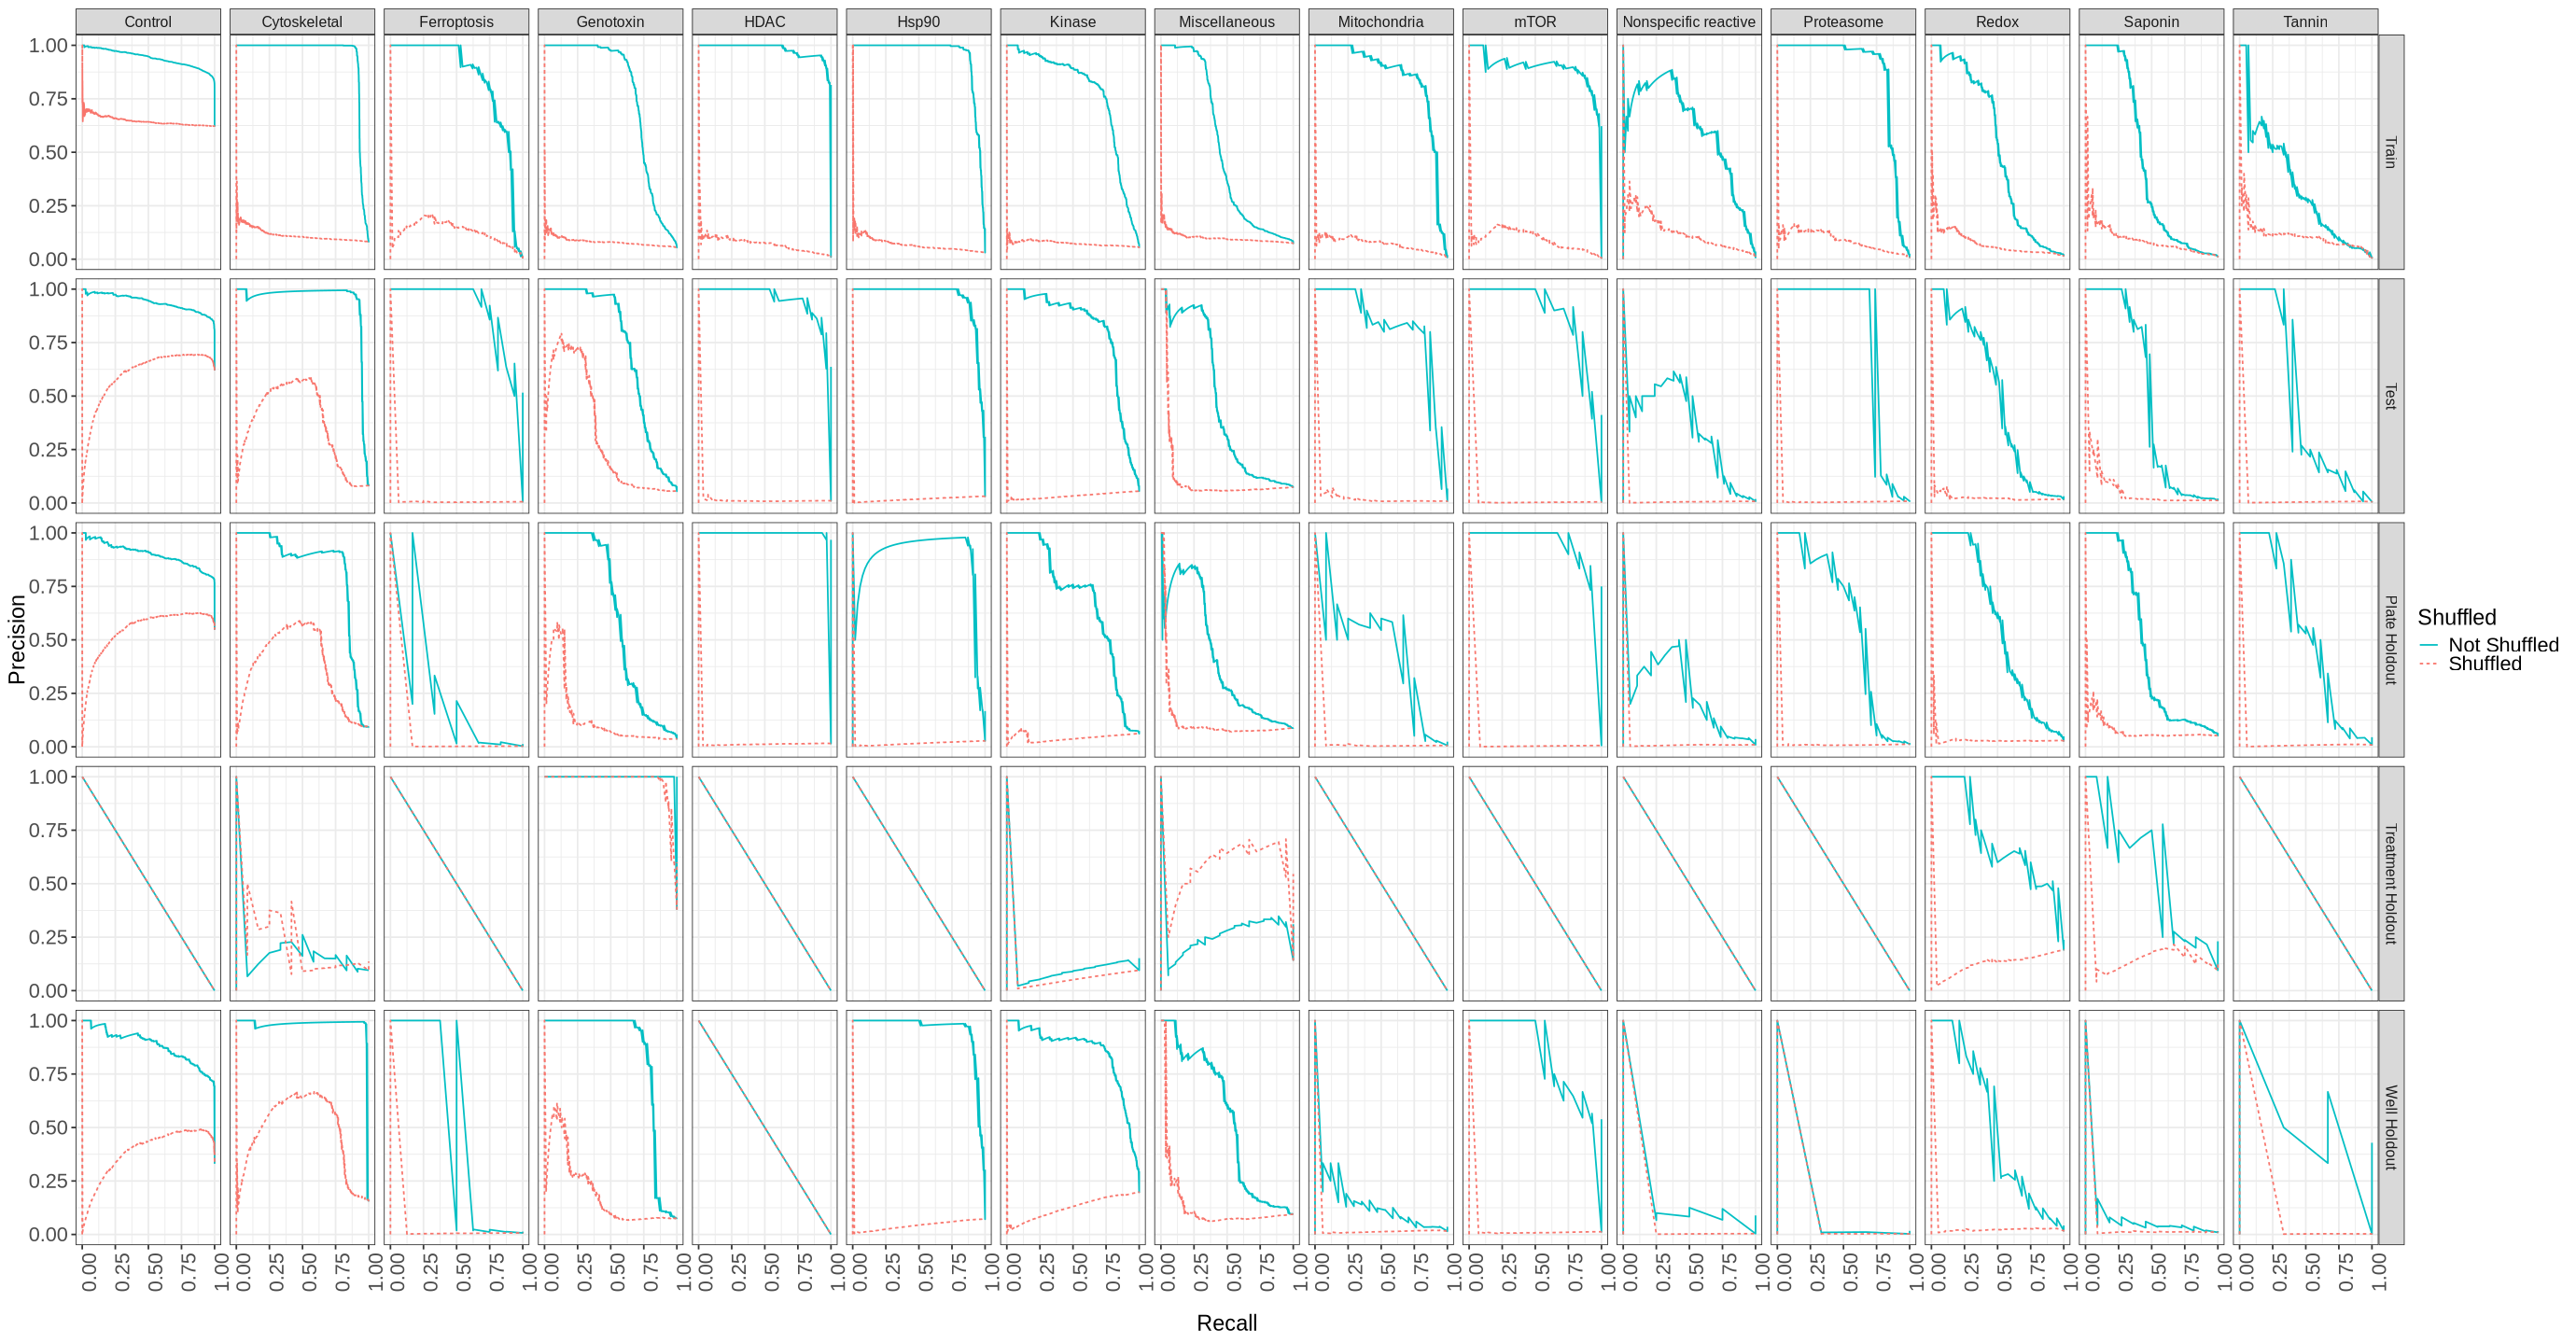

In [8]:
# Define the desired order of dataset_type
dataset_order <- c("Train", "Test", "Plate Holdout", "Treatment Holdout", "Well Holdout")
pr_df$dataset_type <- factor(pr_df$dataset_type, levels = dataset_order)

# Set plot dimensions
width <- 23
height <- 12
options(repr.plot.width = width, repr.plot.height = height)

# Create the plot
pr_curve_plot_all <- ggplot(pr_df, aes(x = recall, y = precision, color = shuffled)) +
  geom_line(aes(linetype = shuffled)) +
  facet_grid(dataset_type ~ injury_type) +
  theme_bw() +

  theme(
    legend.spacing.y = unit(0.1, "cm"),
    legend.box.spacing = unit(0.1, "cm"),
    legend.key.size = unit(0.7, "lines"),
    legend.key.width = unit(1, "lines"),
    strip.text = element_text(size = 9.5),
    axis.text.x = element_text(angle = 90, size = 13),
    axis.text.y = element_text(size = 13),
    axis.title = element_text(size = 14),
    axis.title.x.bottom = element_text(margin = margin(t = 15)),
    axis.title.y.left = element_text(margin = margin(t = 15)),
    legend.title = element_text(size = 14),
    legend.text = element_text(size = 13)
    ) +

 scale_color_manual(values = c(
      "Shuffled" = "#f8766d",
      "Not Shuffled" = "#03bfc4"
    )) +

labs(x = "Recall", y = "Precision", linetype = "Shuffled", color = "Shuffled")

# Save the plot
ggsave("figures/full_pr_curves.png", width = width, height = height, dpi = 600)

pr_curve_plot_all

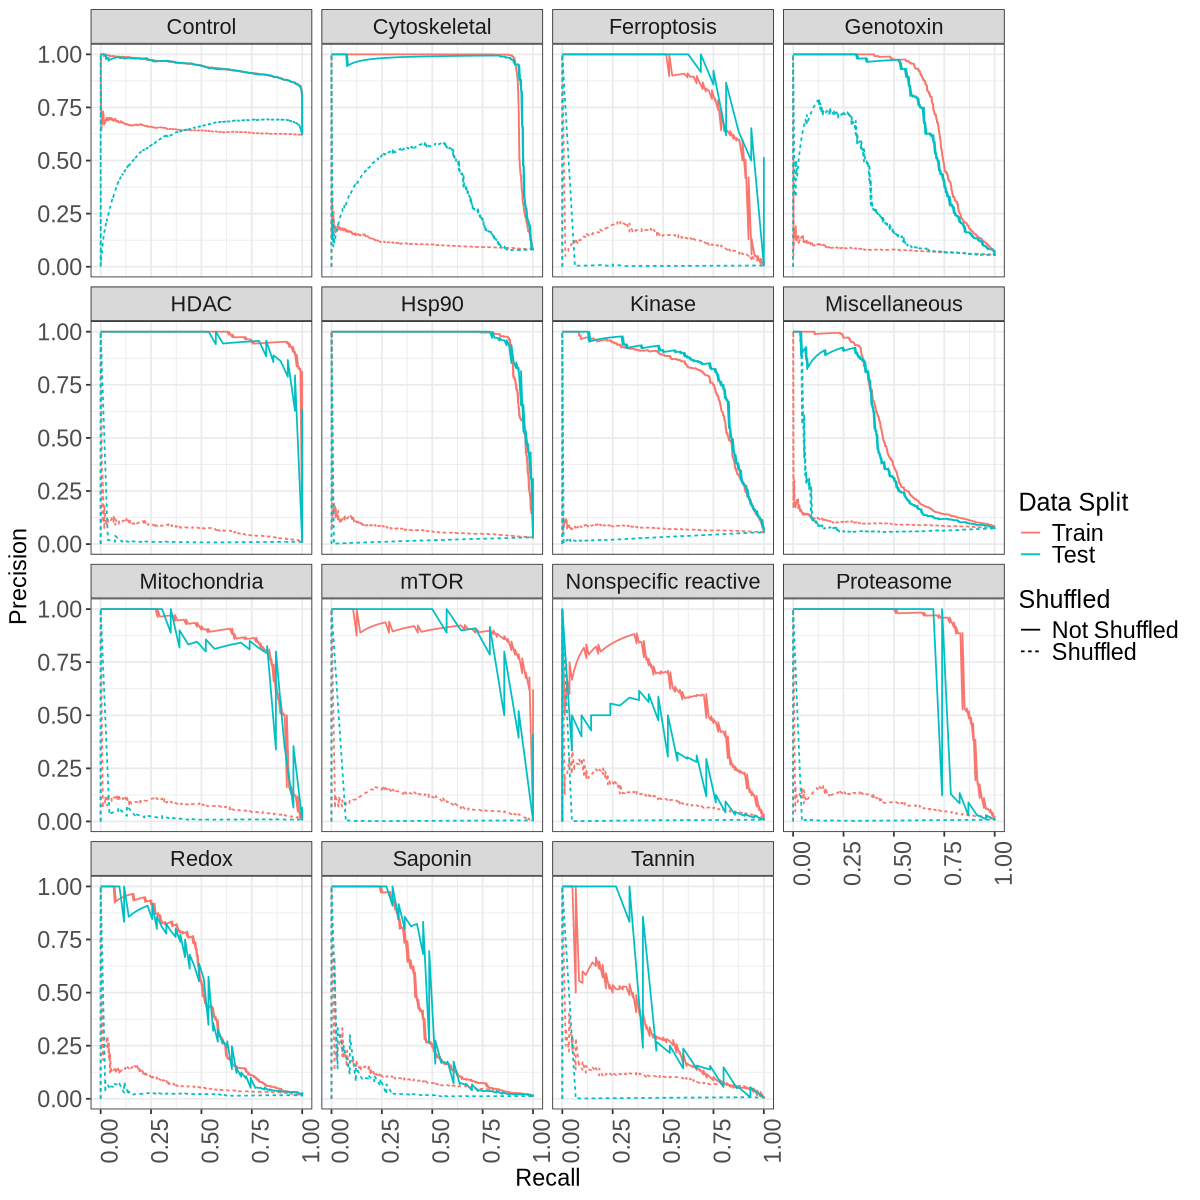

In [9]:
# Filter the dataframe to select only "test", "train", and "plate_holdout" datasets
filtered_pr_df <- pr_df %>%
  filter(dataset_type %in% c("Test", "Train"))

# Create line_id column
filtered_pr_df <- filtered_pr_df %>%
  mutate(line_id = case_when(
    dataset_type == "Test" & shuffled == "Not Shuffled" ~ "Test + Not Shuffled",
    dataset_type == "Test" & shuffled == "Shuffled" ~ "Test + Shuffled",
    dataset_type == "Train" & shuffled == "Not Shuffled" ~ "Train + Not Shuffled",
    dataset_type == "Train" & shuffled == "Shuffled" ~ "Train + Shuffled",
  )) %>%
  mutate(is_train_test = if_else(dataset_type %in% c("test", "train"), "test_train", "plate_holdout"))

# plot data
width <- 10
height <- 10
options(repr.plot.width = width, repr.plot.height = height)

pr_curve_plot_train_test <- ggplot(filtered_pr_df, aes(x = recall, y = precision)) +
    geom_line(aes(color = dataset_type, linetype = shuffled)) +
    facet_wrap(~injury_type) +
    xlab("Recall") +
    ylab("Precision") +
    theme_bw() +
    theme(
        legend.spacing.y = unit(0.1, "cm"),
        legend.box.spacing = unit(0.1, "cm"),
        legend.key.size = unit(0.7, "lines"),
        legend.key.width = unit(1, "lines"),
        axis.text.x = element_text(angle = 90, size = 14),
        axis.text.y = element_text(size = 14),
        strip.text = element_text(size = 13),
        axis.title = element_text(size = 14),
        legend.title = element_text(size = 15),
        legend.text = element_text(size = 14)) +
    labs(color = "Data Split", linetype = "Shuffled")

ggsave("figures/only_test_train_pr_curve.png", width = width, height = height, dpi=600)

pr_curve_plot_train_test

## Probability plot

Warning message in brewer.pal(2, "Dark2"):
“minimal value for n is 3, returning requested palette with 3 different levels
”


Picking joint bandwidth of 0.00659

Picking joint bandwidth of 0.00549

Picking joint bandwidth of 0.00546

Picking joint bandwidth of 0.00712

Picking joint bandwidth of 0.009

Picking joint bandwidth of 0.00733

Picking joint bandwidth of 0.00689

Picking joint bandwidth of 0.00651

Picking joint bandwidth of 0.00743

Picking joint bandwidth of 0.00476

Picking joint bandwidth of 0.00645

Picking joint bandwidth of 0.00702

Picking joint bandwidth of 0.00736

Picking joint bandwidth of 0.00729

Picking joint bandwidth of 0.00647

Picking joint bandwidth of 0.00659

Picking joint bandwidth of 0.00549

Picking joint bandwidth of 0.00546

Picking joint bandwidth of 0.00712

Picking joint bandwidth of 0.009

Picking joint bandwidth of 0.00733

Picking joint bandwidth of 0.00689

Picking joint bandwidth of 0.00651

Picking joint bandwidth of 0.00743

Picking joint bandwidth of 0.00476

Picking joint bandwidth of 0.00645

Picking joint bandwidth of 0.00702

Picking joint bandwidth of 0.007

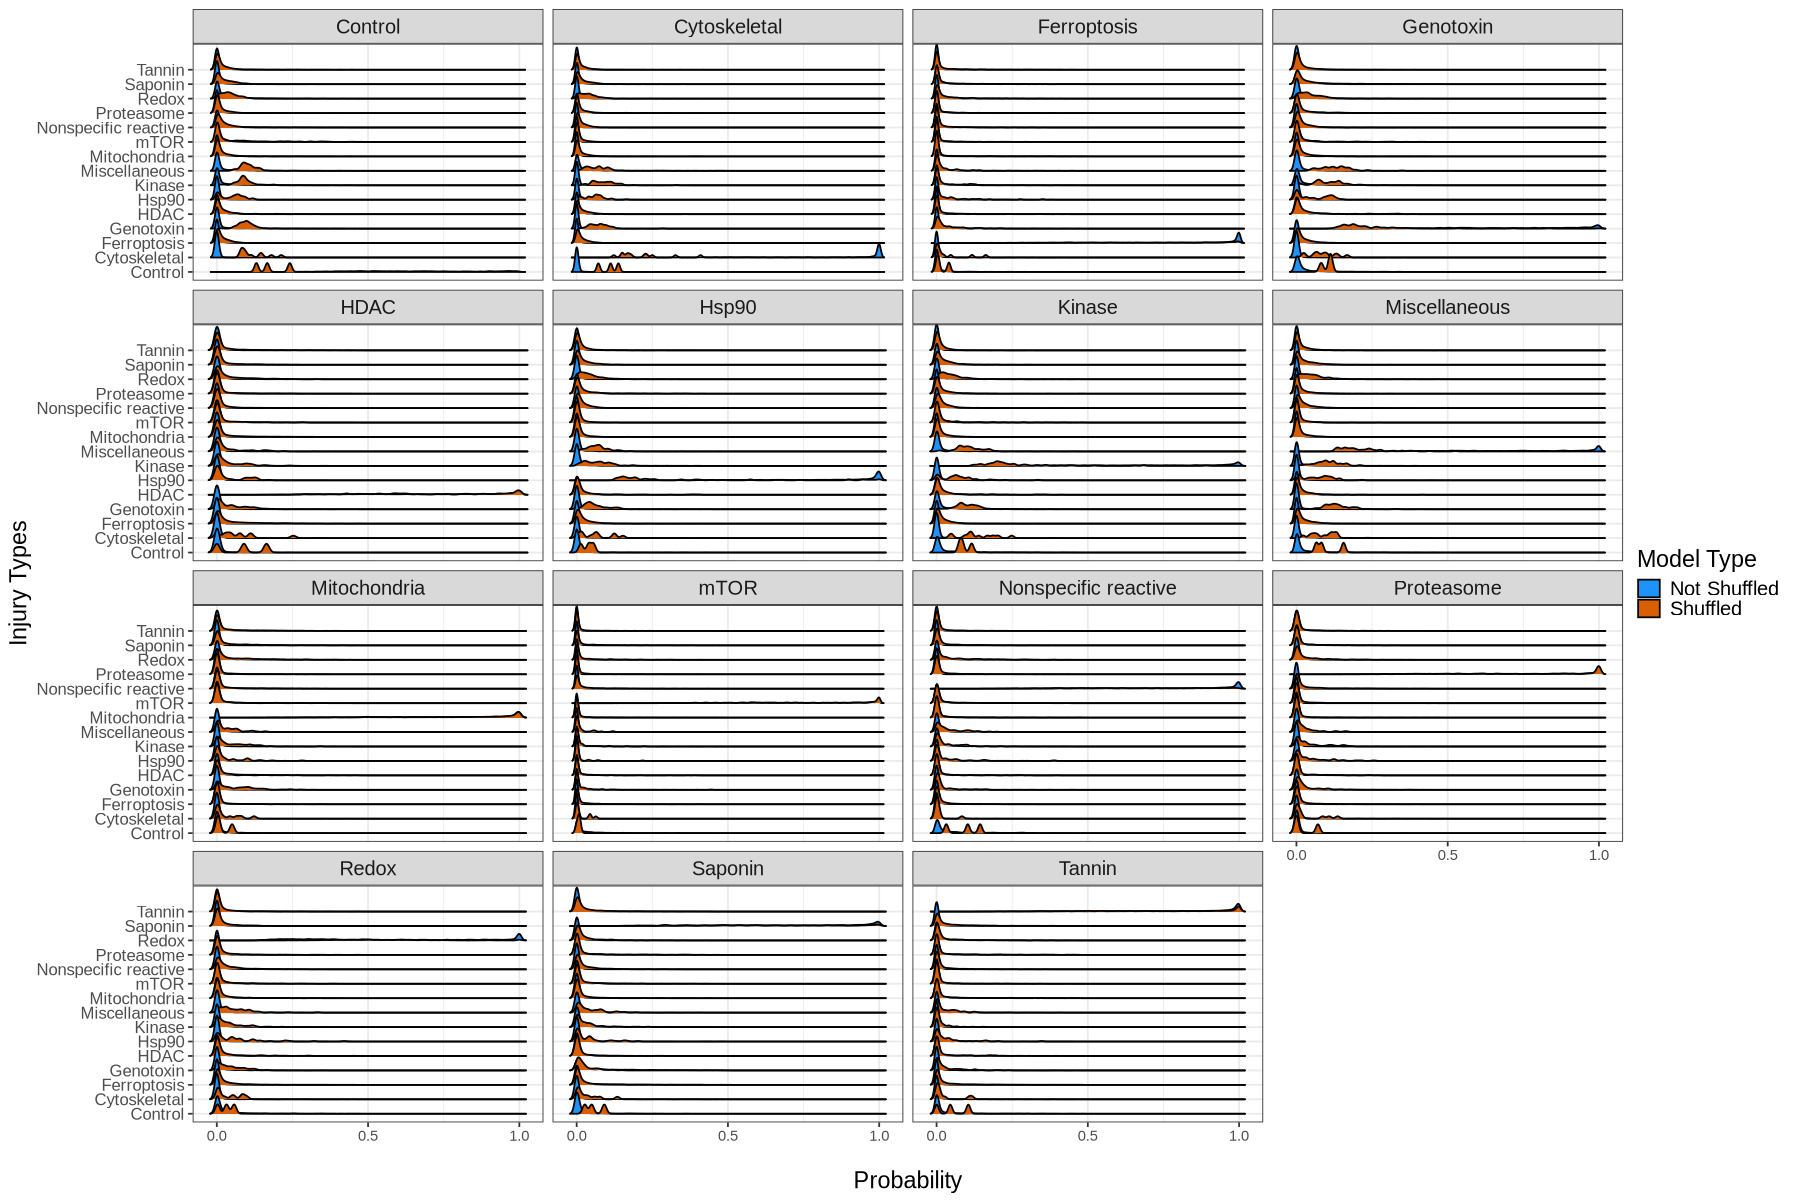

In [10]:
# image size
img_height <- 10
img_width <- 15

options(repr.plot.width = img_width, repr.plot.height = img_height)
probabilities_ridge_plot <- (
    ggplot(proba_df, aes(x = proba, y = pred_injury, fill = shuffled_model)) +
    geom_density_ridges() +
    facet_wrap(~injury_type) +
    scale_x_continuous(breaks = seq(0, 1, 0.5)) +
    theme_bw() +

    # no legend
    theme(plot.title = element_text(size = 20, hjust = 0.5)) +

    scale_fill_manual(values = c(
    "Shuffled" = brewer.pal(2, "Dark2")[2],
    "Not Shuffled" = "#1E93FC"
    )) +

    theme(
        axis.title.x = element_blank(),
        legend.spacing.y = unit(0.1, "cm"),
        legend.box.spacing = unit(0.1, "cm"),
        legend.key.size = unit(0.7, "lines"),
        legend.key.width = unit(1, "lines"),
        strip.text = element_text(size = 12),
        axis.text.y = element_text(size = 10),
        axis.title = element_text(size = 14),
        axis.title.x.bottom = element_text(margin = margin(t = 15)),
        axis.title.y.left = element_text(margin = margin(t = 15)),
        legend.title = element_text(size = 14),
        legend.text = element_text(size = 12)
        )) +

    labs(y = "Injury Types", x = "Probability", fill = "Model Type")


ggsave(filename = "figures/JUMP_cell_injury_facet_proba.png", height = img_height, width = img_width, dpi=600)
probabilities_ridge_plot

## Finalizing figure with patchwork

Picking joint bandwidth of 0.00659

Picking joint bandwidth of 0.00549

Picking joint bandwidth of 0.00546

Picking joint bandwidth of 0.00712

Picking joint bandwidth of 0.009

Picking joint bandwidth of 0.00733

Picking joint bandwidth of 0.00689

Picking joint bandwidth of 0.00651

Picking joint bandwidth of 0.00743

Picking joint bandwidth of 0.00476

Picking joint bandwidth of 0.00645

Picking joint bandwidth of 0.00702

Picking joint bandwidth of 0.00736

Picking joint bandwidth of 0.00729

Picking joint bandwidth of 0.00647



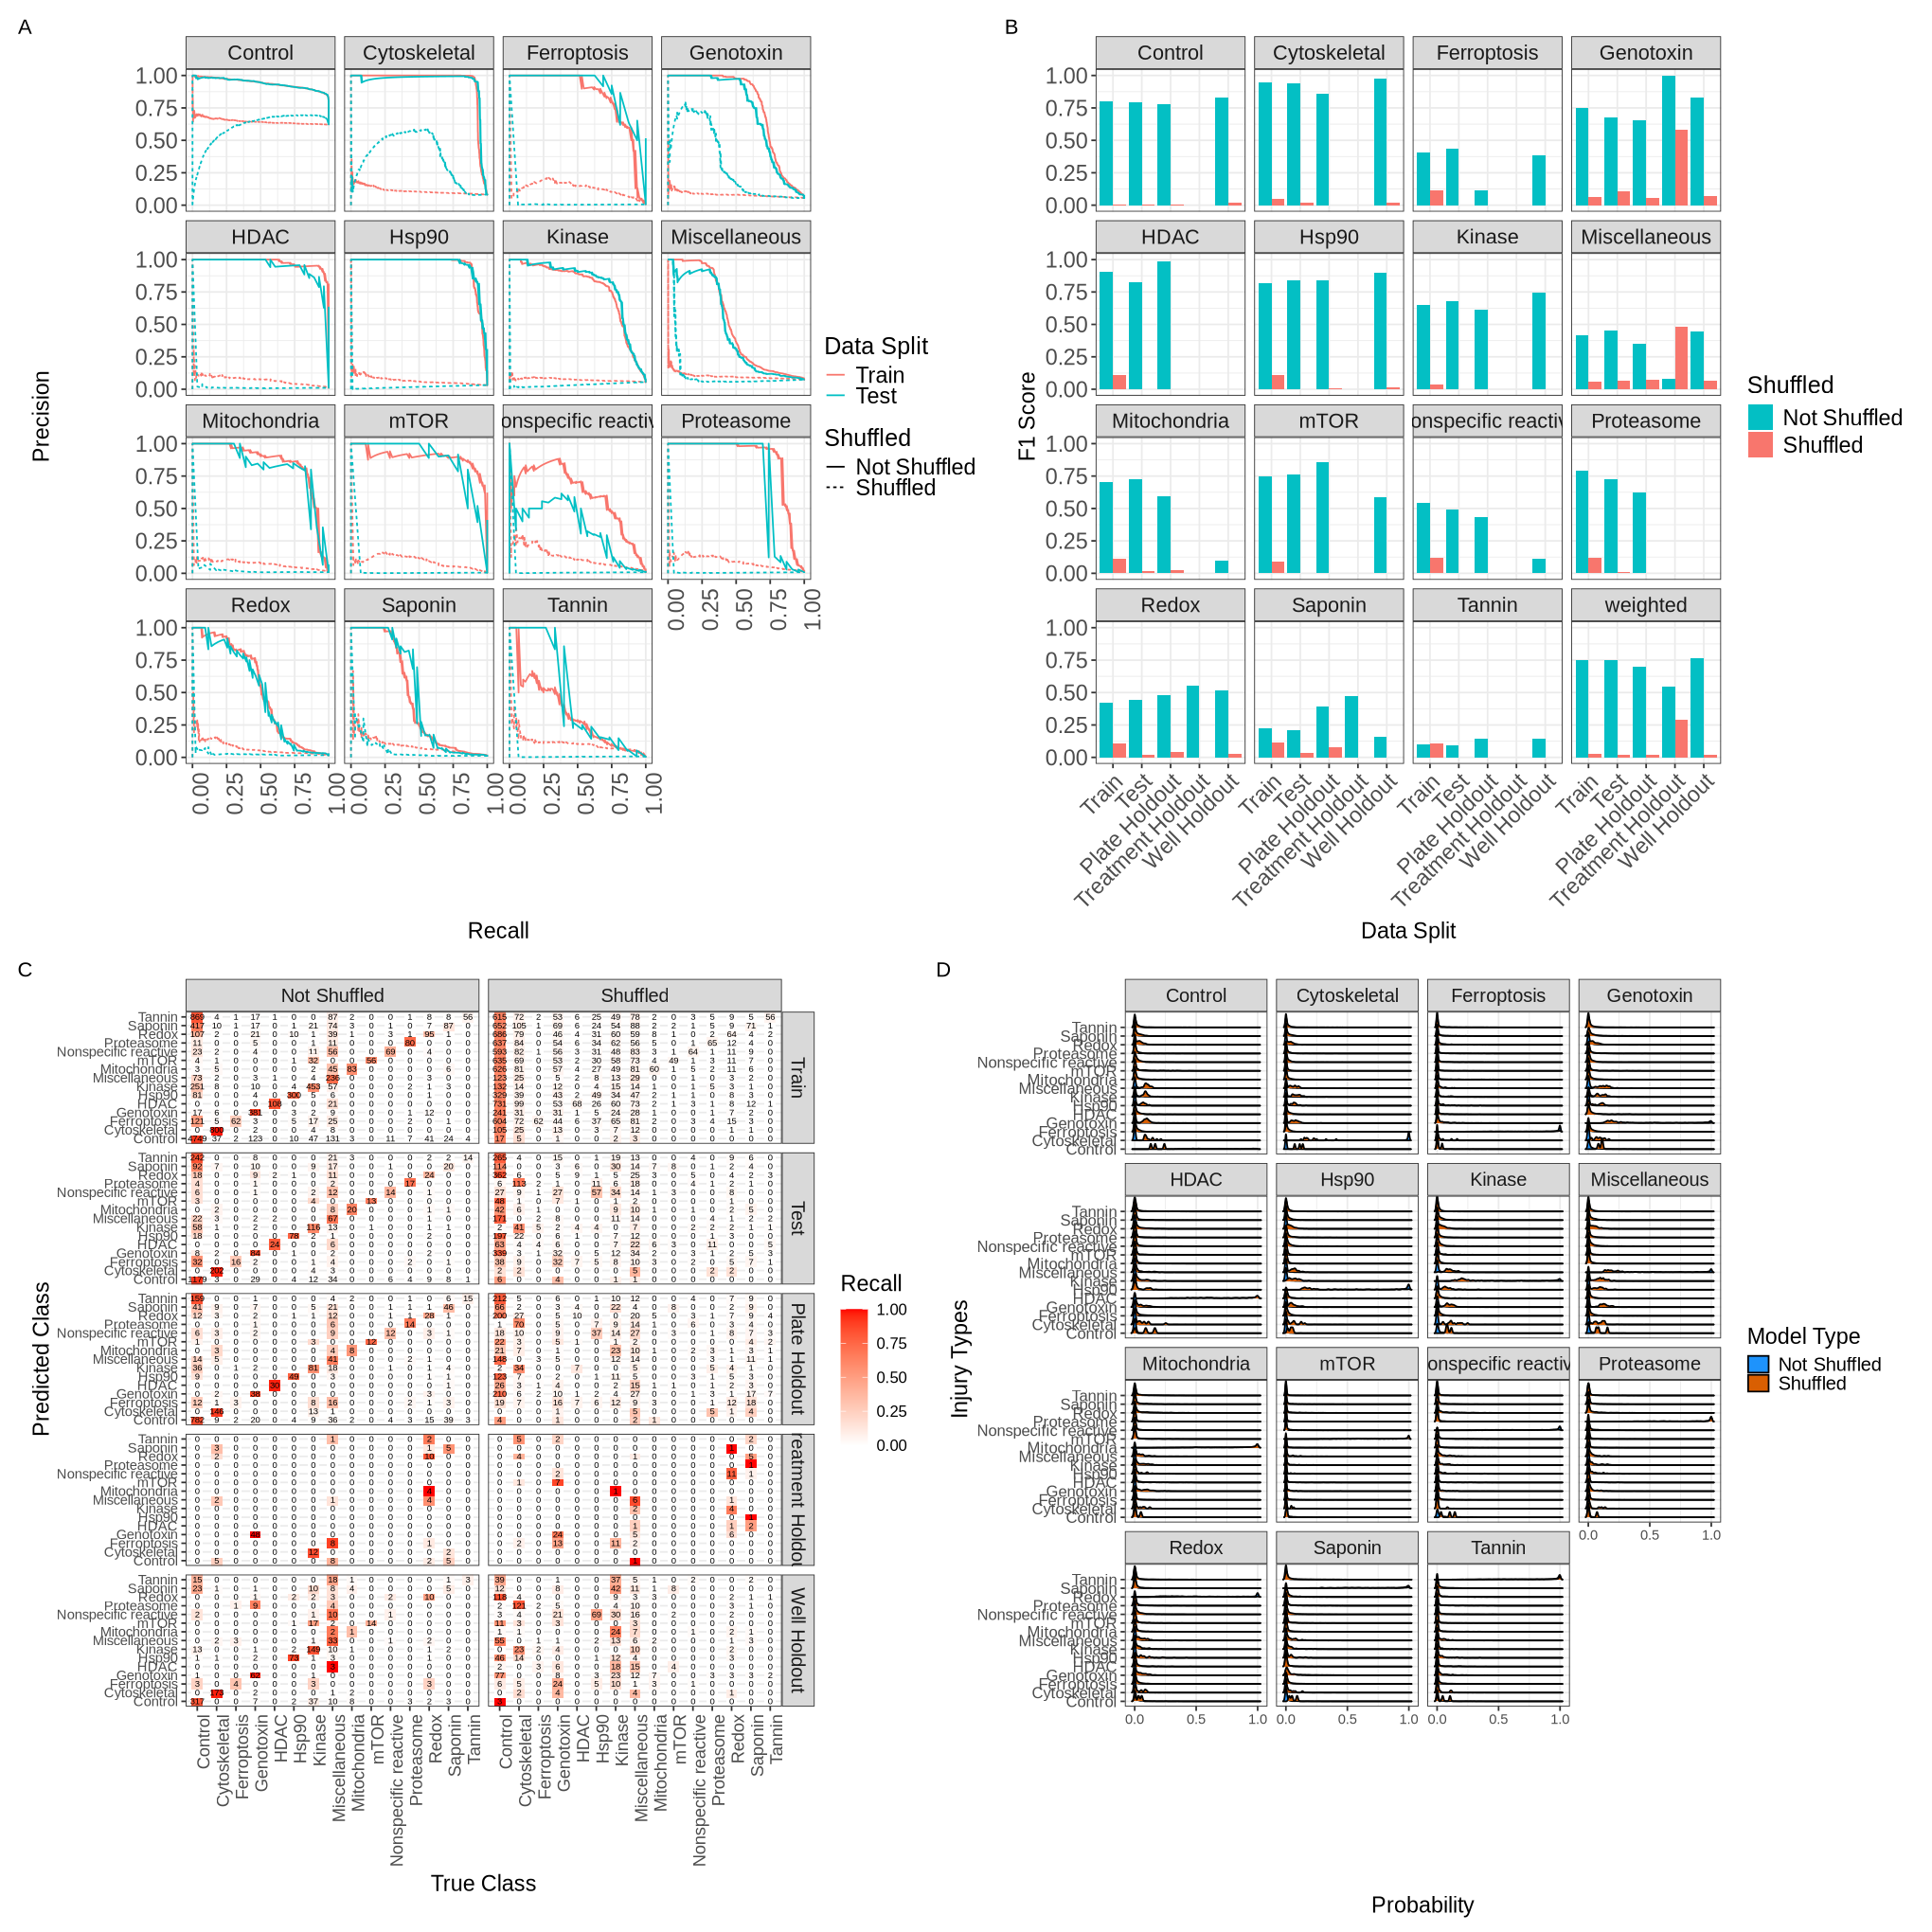

In [20]:
# plot dims
height = 17
width = 17

options(repr.plot.width=width, repr.plot.height=height, units = "cm", dpi = 600)

# Combine plots using patchwork
top_plot<- (
  pr_curve_plot_train_test | 
  f1_bar_plot
) + plot_layout(widths = c(2, 2))

bottom_plot <- (
  confusion_matrix_plot | 
  probabilities_ridge_plot
)

fig2 <- (
  top_plot /
  bottom_plot
) + plot_annotation(tag_levels = "A") + plot_layout(heights = c(3, 3))


# Adjust layout and appearance (optional)
combined_plot <- combined_plot +
  plot_layout(ncol = 2, nrow = 2, byrow = TRUE)  # Adjust the grid layout as needed

# Display the combined plot
fig2

